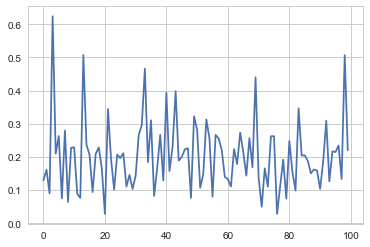

In [14]:
%matplotlib inline
import numpy as np

N = 100
D = 2

X = np.hstack((np.ones((N,1)), np.random.randn(N,D)))

w = np.random.randn(D+1)

def logistic(data):
    return 1 / (1 + np.exp(-1*data))

plt.plot(logistic(X.dot(w)))

In [32]:
import pandas as pd

df = pd.read_csv('./ecommerce_data.csv')
df.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


In [40]:
df['user_action'].value_counts()

0    253
1    145
2     77
3     25
Name: user_action, dtype: int64

In [61]:
def preprocess(df):
    X = df.as_matrix()[:, :5]
    Y = df.as_matrix()[:, 5]
    
    # Standardization
    X[:, 1] = (X[:, 1] - X[:, 1].mean())/ X[:, 1].std()
    X[:, 2] = (X[:, 2] - X[:, 2].mean())/ X[:, 2].std()

    # One Hot Encoding of time_of_day
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:, 0:D-1] = X[:, 0:D-1]
    for n in range(N):
        X2[n, int(X[n, D-1]) + D - 1] = 1

    Z = np.zeros((N, 4))
    Z[np.arange(N), X[:, D-1].astype(np.int32)] = 1
    assert(np.abs(X2[:, -4:] -Z).sum() < 10e-10)
    return X2, Y

def get_binary_data(df):
    X, Y = preprocess(df)
    return X[Y <= 1], Y[Y <= 1]

In [96]:
X, Y = get_binary_data(df)
D = X.shape[1]
W = np.random.normal(0, np.sqrt(1/D), D)
b = 0

def logistic(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W, b):
    return logistic(X.dot(W) + b)

P_Y_given_X = forward(X, W, b)
predictions = np.round(P_Y_given_X)
predictions

def classification_rate(Y, P):
    return np.mean(Y == P)

print("Score: {}".format(classification_rate(Y, predictions)))

Score: 0.5175879396984925
